<a href="https://colab.research.google.com/github/isaacbyr/Practice-Projects/blob/main/Video_Game_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook I am going to be looking at a dataset from www.kaggle.com which has video game sales from 1980 to 2020. I am going to lay out a bunch of questions for me to answer. This is inspired from a few other worksheets I saw on kaggle correpsonding to this dataset

Importing Packages and Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import os

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"isaacbyr","key":"5881667892cb724f4234844a7f6ae768"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp  kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d gregorut/videogamesales

  0% 0.00/381k [00:00<?, ?B/s]
100% 381k/381k [00:00<00:00, 52.0MB/s]


In [5]:
!mkdir video_games_sales
!mv videogamesales.zip video_games_sales

In [6]:
%cd video_games_sales/

/content/video_games_sales


In [7]:
!unzip videogamesales.zip

Archive:  videogamesales.zip
  inflating: vgsales.csv             


In [8]:
df = pd.read_csv('/content/video_games_sales/vgsales.csv')

In [9]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [13]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [14]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [18]:
# even though Year has 271 values that are missing it only equates for 1.6% of all Year data 
df['Year'].isnull().sum() / len(df) * 100

1.6327268345583803

I have a list of questions from another notebook on this dataset that I am going to work through on my own.

What genre of games have been made the most?

In [19]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [40]:
genre = df.groupby('Genre').count().sort_values('Rank',ascending=False)['Rank']
genre = genre.reset_index()
genre

,Genre,Rank
0,Action,3316
1,Sports,2346
2,Misc,1739
3,Role-Playing,1488
4,Shooter,1310
5,Adventure,1286
6,Racing,1249
7,Platform,886
8,Simulation,867
9,Fighting,848


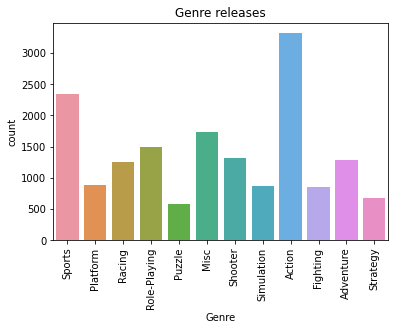

In [47]:
# there is a handful of ways we can graph this problem. I am going to start by using sns.countplot

sns.countplot(data=df, x='Genre')
plt.xticks(rotation = 'vertical')
plt.title('Genre releases')
plt.show()

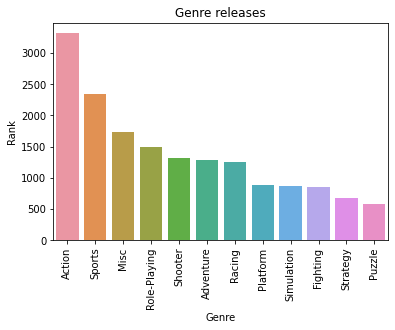

In [42]:
# another way to graph it using sns.barplot

sns.barplot(data=genre, x='Genre', y='Rank')
plt.xticks(rotation = 'vertical')
plt.title('Genre releases')
plt.show()

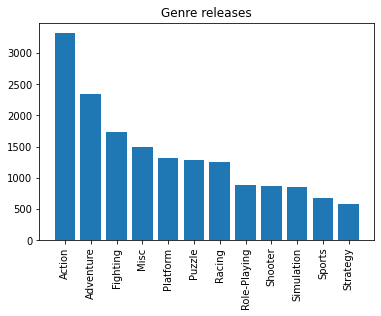

In [45]:
# We could also use plt.bar 

genres = [genre for genre, df in df.groupby('Genre')] #stores a list of all the genres
count = genre['Rank']

plt.bar(genres, count)
plt.xticks(rotation = 'vertical')
plt.title('Genre releases')
plt.show()

What year had the highest sales worldwide?

In [58]:
yearly_sales = df.groupby("Year").sum().sort_values('Global_Sales', ascending = False)
yearly_sales = yearly_sales.reset_index()
yearly_sales

,Year,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2008.0,12088007,351.44,184.40,60.26,82.39,678.90
1,2009.0,12420219,338.85,191.59,61.89,74.77,667.30
2,2007.0,10344609,312.05,160.50,60.29,77.60,611.13
3,2010.0,11059005,304.24,176.73,59.49,59.90,600.45
4,2006.0,9563593,263.12,129.24,73.73,54.43,521.04
5,2011.0,10017438,241.06,167.44,53.04,54.39,515.99
6,2005.0,7728459,242.61,121.94,54.28,40.58,459.94
7,2004.0,5810374,222.59,107.32,41.65,47.29,419.31
8,2002.0,6830188,216.19,109.74,41.76,27.28,395.52
9,2013.0,4398356,154.77,125.80,47.59,39.82,368.11


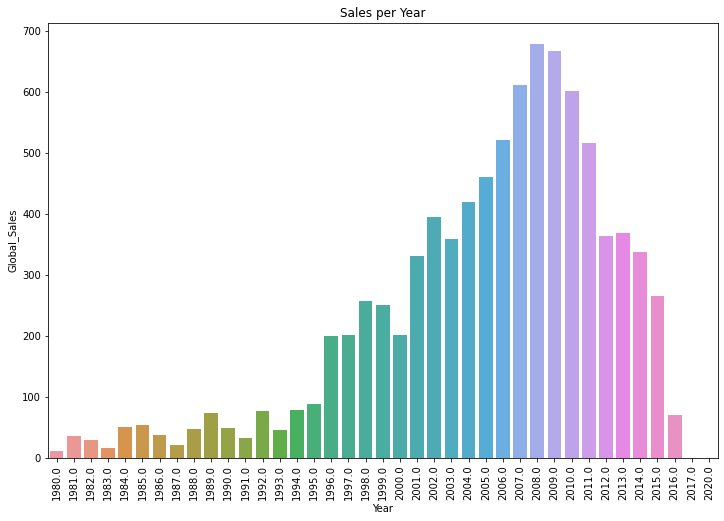

In [60]:
f, ax = plt.subplots(figsize = (12,8))
sns.barplot(data=yearly_sales, x='Year', y='Global_Sales')
plt.xticks(rotation = 'vertical')
plt.title('Sales per Year')
plt.show()

Which year had the most games released?

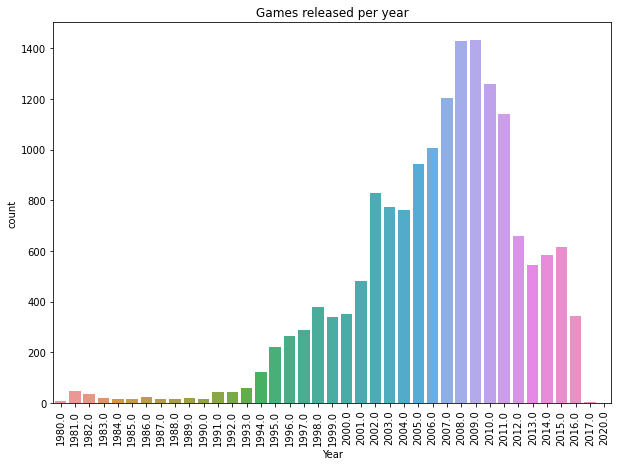

In [64]:
f, ax = plt.subplots(figsize = (10,7))
sns.countplot(data=df, x='Year')
plt.title('Games released per year')
plt.xticks(rotation = 'vertical')
plt.show()

For the top five years, what were the most games released by genre?

In [101]:
releases = df.groupby(['Year', 'Genre']).count().sort_values('Rank', ascending=False).iloc[:5]
releases 

,,Rank,Name,Platform,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,Genre,,,,,,,,,
2009.0,Action,272,272,272,272,272,272,272,272,272
2012.0,Action,266,266,266,265,266,266,266,266,266
2015.0,Action,255,255,255,255,255,255,255,255,255
2011.0,Action,239,239,239,239,239,239,239,239,239
2010.0,Action,226,226,226,226,226,226,226,226,226


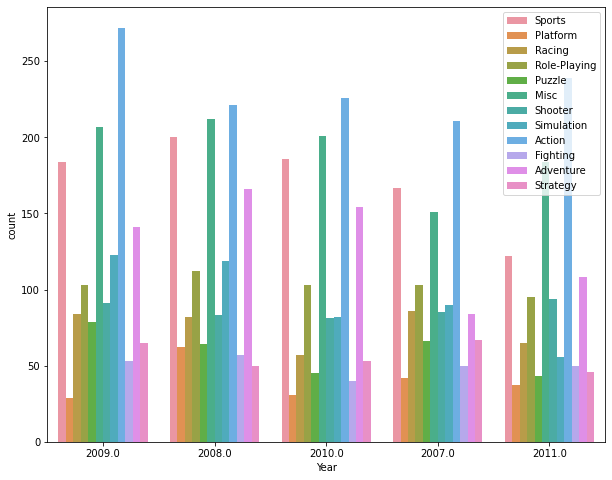

In [100]:
f, ax = plt.subplots(figsize = (10,8))

sns.countplot(data=df, x='Year', hue='Genre', order = df.groupby('Year').count().sort_values('Rank', ascending=False).iloc[:5]['Rank'].index)
plt.legend(loc = 'best')
plt.show()

What game genre has been released the most in a single year?

In [103]:
most_released = df.groupby(['Year', "Genre"]).count().sort_values('Name', ascending=False).iloc[:1]
most_released

,,Rank,Name,Platform,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,Genre,,,,,,,,,
2009.0,Action,272,272,272,272,272,272,272,272,272


What genre game has the highest sales in a single year?

In [115]:
most_sales = df.groupby(['Year', "Genre"]).sum().sort_values('Global_Sales', ascending=False).iloc[:1]['Global_Sales']
most_sales = most_sales.reset_index()
most_sales

,Year,Genre,Global_Sales
0,2009.0,Action,139.36


What genre game has the highest sales globally?

In [117]:
sales = df.groupby('Genre').sum().sort_values("Global_Sales", ascending=False)
sales = sales.reset_index()
sales

,Genre,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,26441383,6531731.0,877.83,525.00,159.95,187.38,1751.18
1,Sports,17419112,4620621.0,683.35,376.85,135.37,134.97,1330.93
2,Shooter,9653872,2571588.0,582.60,313.27,38.28,102.69,1037.37
3,Role-Playing,12032228,2952379.0,327.28,188.06,352.31,59.61,927.37
4,Platform,6137545,1755347.0,447.05,201.63,130.77,51.59,831.37
5,Misc,14889052,3432412.0,410.24,215.98,107.76,75.32,809.96
6,Racing,9943933,2457934.0,359.42,238.39,56.69,77.27,732.04
7,Fighting,6484242,1675871.0,223.59,101.32,87.35,36.68,448.91
8,Simulation,7478816,1707589.0,183.31,113.38,63.70,31.52,392.20
9,Puzzle,5603136,1144994.0,123.78,50.78,57.31,12.55,244.95


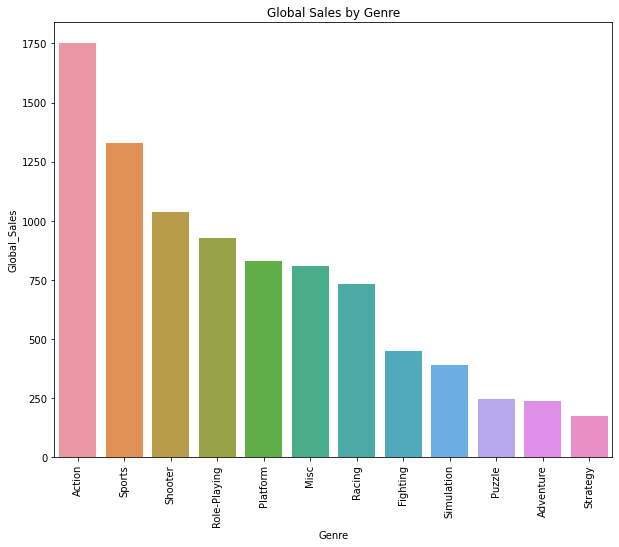

In [119]:
f ,ax = plt.subplots(figsize = (10,8))

sns.barplot(data=sales, x='Genre', y='Global_Sales')
plt.xticks(rotation = 'vertical')
plt.title('Global Sales by Genre')
plt.show()

What platform has the highest sales globally?

In [126]:
platform_sales = df.groupby('Platform').sum().sort_values('Global_Sales', ascending=False).iloc[:20]
platform_sales = platform_sales.reset_index()
platform_sales

,Platform,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,PS2,16159167,4263750.0,583.84,339.29,139.20,193.44,1255.64
1,X360,8466048,2482205.0,601.05,280.58,12.43,85.54,979.96
2,PS3,9027970,2622109.0,392.26,343.71,79.99,141.93,957.84
3,Wii,10243276,2591562.0,507.71,268.38,69.35,80.61,926.71
4,DS,20845831,4283493.0,390.71,194.65,175.57,60.53,822.49
5,PS,8322033,2375627.0,336.51,213.60,139.82,40.91,730.66
6,GBA,7136749,1624604.0,187.54,75.25,47.33,7.73,318.50
7,PSP,12615047,2404440.0,108.99,68.25,76.79,42.19,296.28
8,PS4,2562189,677042.0,96.80,123.70,14.30,43.36,278.10
9,PC,10980787,1894273.0,93.28,139.68,0.17,24.86,258.82


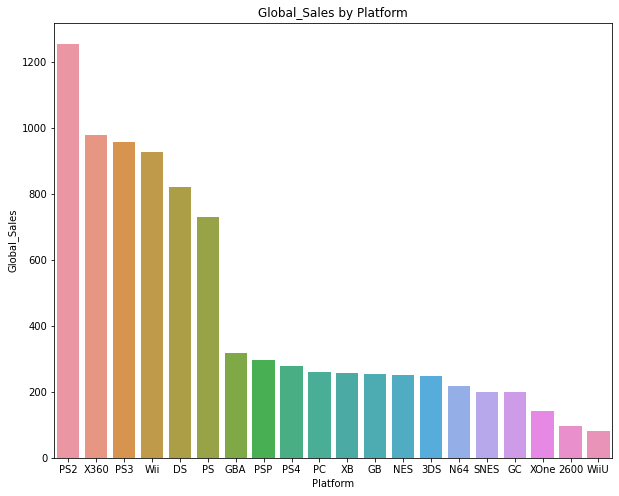

In [128]:
f, ax = plt.subplots(figsize = (10,8))

sns.barplot(data=platform_sales, x='Platform', y='Global_Sales')
plt.title('Global_Sales by Platform')
plt.show()

Which indivual game has the highest sale globally?

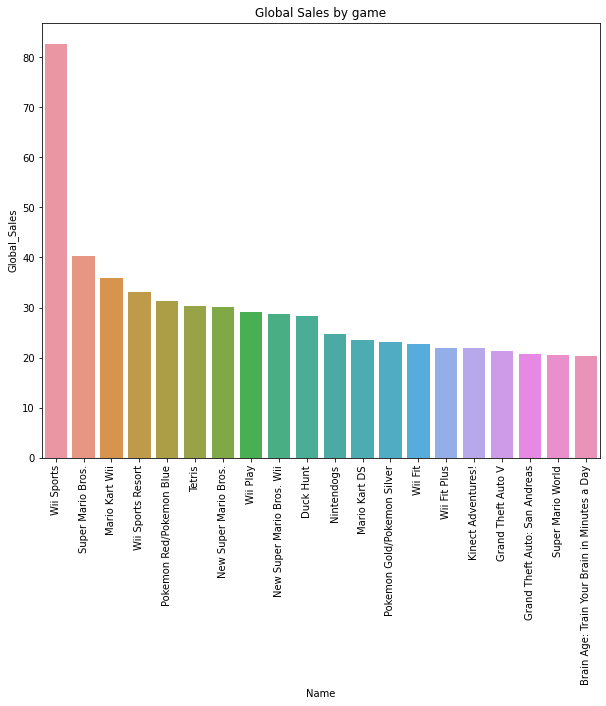

In [139]:
top_games = df.sort_values('Global_Sales').sort_values('Global_Sales', ascending=False).iloc[:20]
top_games

f, ax = plt.subplots(figsize = (10,8))

sns.barplot(data=top_games, x='Name', y='Global_Sales')
plt.xticks(rotation='vertical')
plt.title('Global Sales by game')
plt.show()

Sales comparison by genre?

In [142]:
genre = df.groupby('Genre').sum().sort_values('Global_Sales', ascending=False)
genre = genre.drop(columns = ['Rank','Year'], axis =1)
genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,877.83,525.00,159.95,187.38,1751.18
Sports,683.35,376.85,135.37,134.97,1330.93
Shooter,582.60,313.27,38.28,102.69,1037.37
Role-Playing,327.28,188.06,352.31,59.61,927.37
Platform,447.05,201.63,130.77,51.59,831.37
Misc,410.24,215.98,107.76,75.32,809.96
Racing,359.42,238.39,56.69,77.27,732.04
Fighting,223.59,101.32,87.35,36.68,448.91
Simulation,183.31,113.38,63.70,31.52,392.20


Sales comparison by platform

In [145]:
platform = df.groupby('Platform').sum().sort_values('Global_Sales', ascending=False)
platform = platform.drop(columns=['Rank', 'Year'], axis =1)
platform

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
PS2,583.84,339.29,139.20,193.44,1255.64
X360,601.05,280.58,12.43,85.54,979.96
PS3,392.26,343.71,79.99,141.93,957.84
Wii,507.71,268.38,69.35,80.61,926.71
DS,390.71,194.65,175.57,60.53,822.49
PS,336.51,213.60,139.82,40.91,730.66
GBA,187.54,75.25,47.33,7.73,318.50
PSP,108.99,68.25,76.79,42.19,296.28
PS4,96.80,123.70,14.30,43.36,278.10


Top 20 publishers

In [154]:
publishers = df.groupby('Publisher').count().sort_values('Name', ascending=False).iloc[:20]
publishers

,Rank,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,,,,,,
Electronic Arts,1351,1351,1351,1339,1351,1351,1351,1351,1351,1351
Activision,975,975,975,966,975,975,975,975,975,975
Namco Bandai Games,932,932,932,928,932,932,932,932,932,932
Ubisoft,921,921,921,918,921,921,921,921,921,921
Konami Digital Entertainment,832,832,832,823,832,832,832,832,832,832
THQ,715,715,715,712,715,715,715,715,715,715
Nintendo,703,703,703,696,703,703,703,703,703,703
Sony Computer Entertainment,683,683,683,682,683,683,683,683,683,683
Sega,639,639,639,632,639,639,639,639,639,639


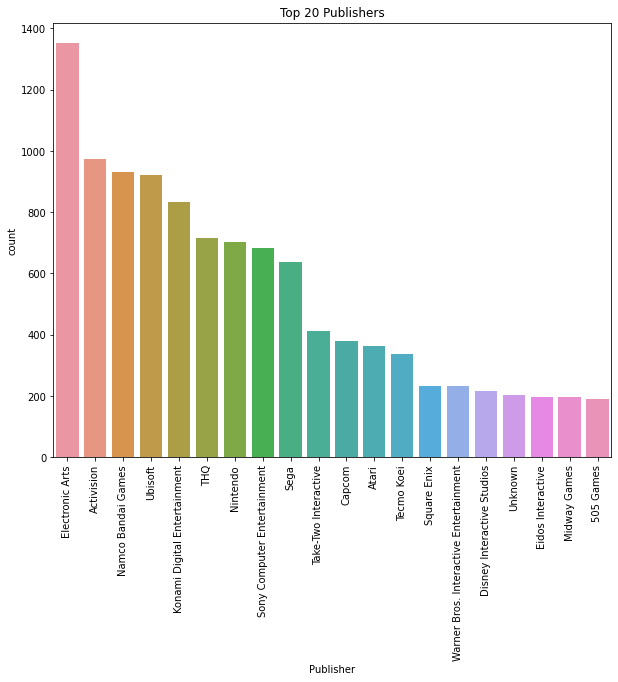

In [151]:
f ,ax = plt.subplots(figsize = (10,8))

sns.countplot(data=df, x='Publisher', order = df['Publisher'].value_counts().iloc[:20].index)
plt.xticks(rotation = 'vertical')
plt.title('Top 20 Publishers')
plt.show()

Total revenue by region

In [163]:
top_rev = df[['NA_Sales','EU_Sales', 'JP_Sales','Other_Sales']]
top_rev = top_rev.sum().reset_index()
top_rev = top_rev.rename(columns= {'index':'Region', 0:'Sales'})
top_rev

,Region,Sales
0,NA_Sales,4392.95
1,EU_Sales,2434.13
2,JP_Sales,1291.02
3,Other_Sales,797.75
